# Custom indicator example

In [1]:
import yfinance as yf

from mplchart.chart import Chart

from mplchart.library import get_series, calc_ema
from mplchart.primitives import Candlesticks, OHLC, Volume

from dataclasses import dataclass

In [2]:
ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="5y")
prices

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-06-06 00:00:00-04:00,44.172501,44.749146,43.948114,44.688828,90105200,0.0,0.0
2019-06-07 00:00:00-04:00,45.000065,46.305360,44.821525,45.878304,122737600,0.0,0.0
2019-06-10 00:00:00-04:00,46.278829,47.137765,46.232986,46.464611,104883600,0.0,0.0
2019-06-11 00:00:00-04:00,47.014708,47.289761,46.710704,47.002644,107731600,0.0,0.0
2019-06-12 00:00:00-04:00,46.795147,47.282522,46.660034,46.853054,73012800,0.0,0.0
...,...,...,...,...,...,...,...
2024-05-30 00:00:00-04:00,190.759995,192.179993,190.630005,191.289993,49947900,0.0,0.0
2024-05-31 00:00:00-04:00,191.440002,192.570007,189.910004,192.250000,75158300,0.0,0.0
2024-06-03 00:00:00-04:00,192.899994,194.990005,192.520004,194.029999,50080500,0.0,0.0


In [3]:
@dataclass
class DEMA:
    """Double Exponential Moving Average"""

    period: int = 20

    same_scale = True
    # same_scale is an optional class attribute
    # to specify that the indicator can be drawn
    # on the same axes as the previous indicator

    def __call__(self, prices):
        series = get_series(prices)
        ema1 = calc_ema(series, self.period)
        ema2 = calc_ema(ema1, self.period)
        return 2 * ema1 - ema2

In [4]:
res = DEMA(20)(prices)
res.tail()

Date
2024-05-30 00:00:00-04:00    191.976875
2024-05-31 00:00:00-04:00    192.532543
2024-06-03 00:00:00-04:00    193.307749
2024-06-04 00:00:00-04:00    194.006931
2024-06-05 00:00:00-04:00    194.858124
Name: close, dtype: float64

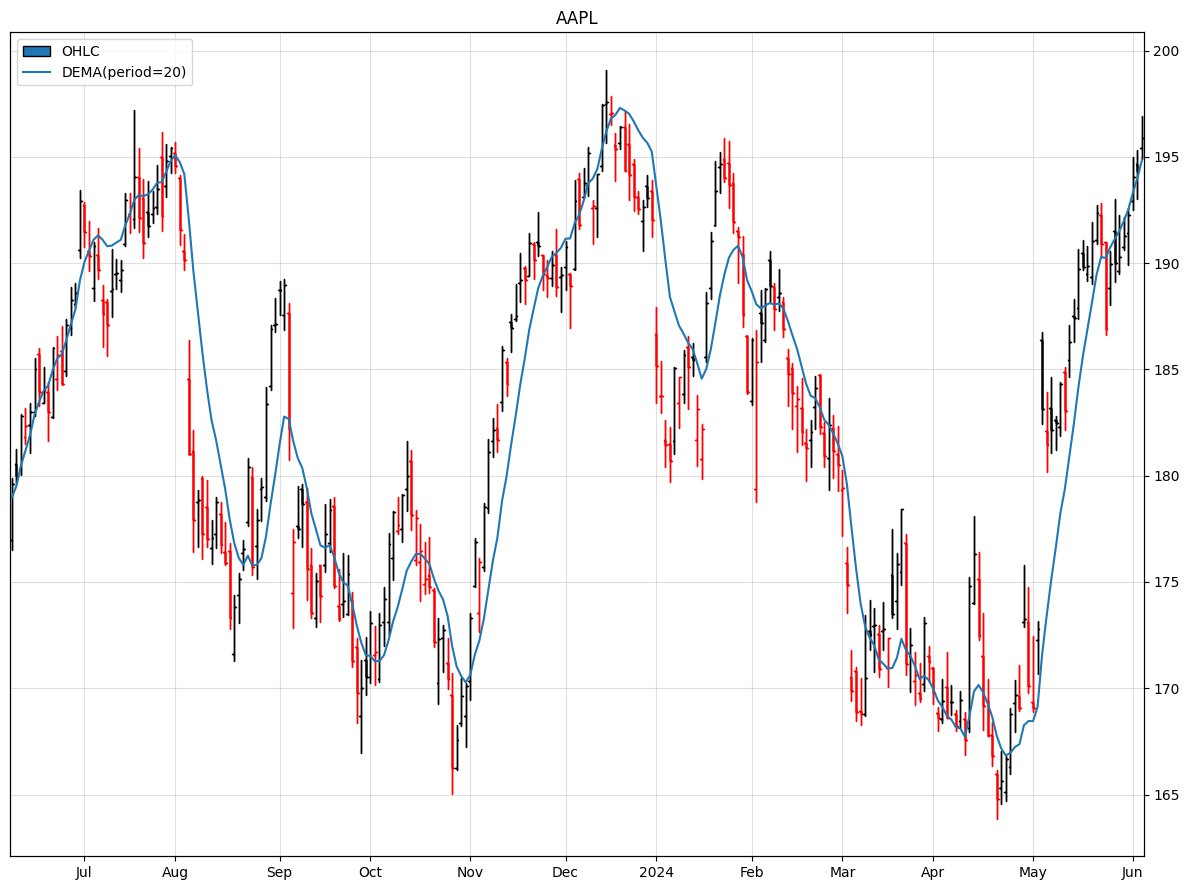

In [5]:
max_bars = 250

indicators = [
    OHLC(),
    DEMA(20),
]

chart = Chart(title=ticker, max_bars=max_bars)
chart.plot(prices, indicators)